In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import plotly.express as ex
import pandas as pd

from numpy import exp

from tracking.motion import SingerAccelerationModel
from tracking.target import SinusTarget, SingerTarget, sample_singer
from tracking.kalman import KalmanFilter
from tracking.evaluation import evaluate, monte_carlo, rmse
from tracking.util import to_df

# Preface

In order make it easier to interpret the results of Monte Carlo testing of alternative motions models, we need to set up representative scales for target movement and measurement error. We will therefore assume a target moving at the distance of about 5km and measurement error symmetric in all 3 dimensions, equivalent to a given angular error from a distance of 5km:

$$
\sigma_z = d \cdot \tan{\sigma_\alpha}
$$

where $d=5km$ is the distance between target and sensor and $\alpha$ is the assumed angular error:

* $\sigma_\alpha=0.01\degree$ means $\sigma_z=.87m$
* $\sigma_\alpha=0.1\degree$ means $\sigma_z=8.72m$
* $\sigma_\alpha=1\degree$ means $\sigma_z=87.2m$

# Turning target

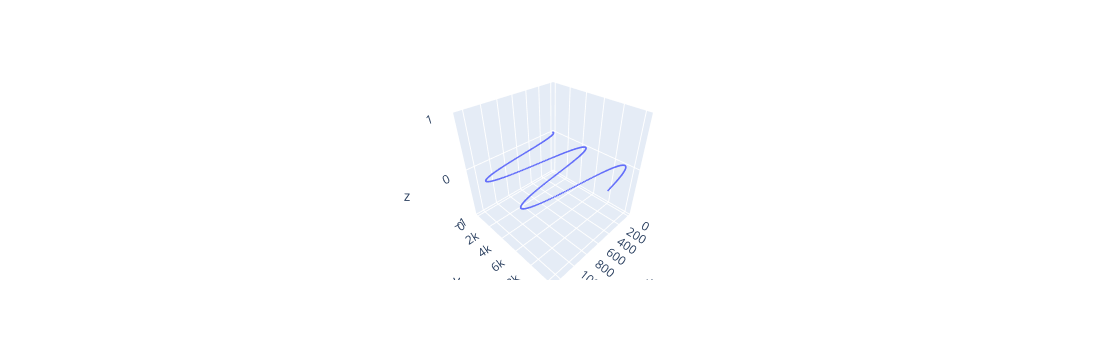

In [34]:
target = SinusTarget(heading_change_rate=2)

fig = ex.scatter_3d(target.positions_df(), x='x', y='y', z='z')
fig.update_traces(marker_size = 1)
fig